<!-- Import Libraries -->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('banknotes.csv')

In [3]:
df

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...,...
195,1,215.0,130.4,130.3,9.9,12.1,139.6
196,1,215.1,130.3,129.9,10.3,11.5,139.7
197,1,214.8,130.3,130.4,10.6,11.1,140.0
198,1,214.7,130.7,130.8,11.2,11.2,139.4


In [4]:
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [5]:
df.describe()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


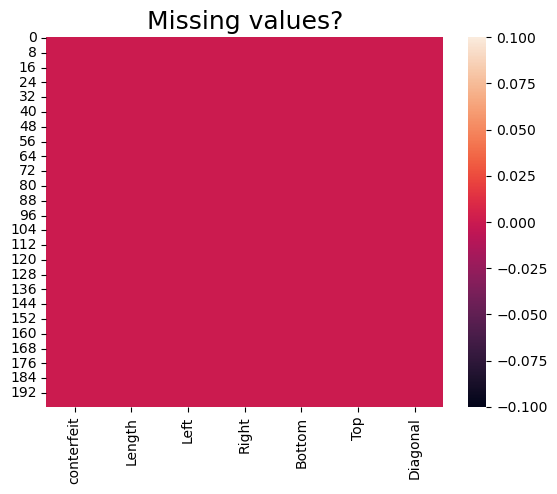

In [7]:
sns.heatmap(df.isnull())
plt.title("Missing values?",fontsize = 18)
plt.show()

<!-- No MISSING VALUES -->

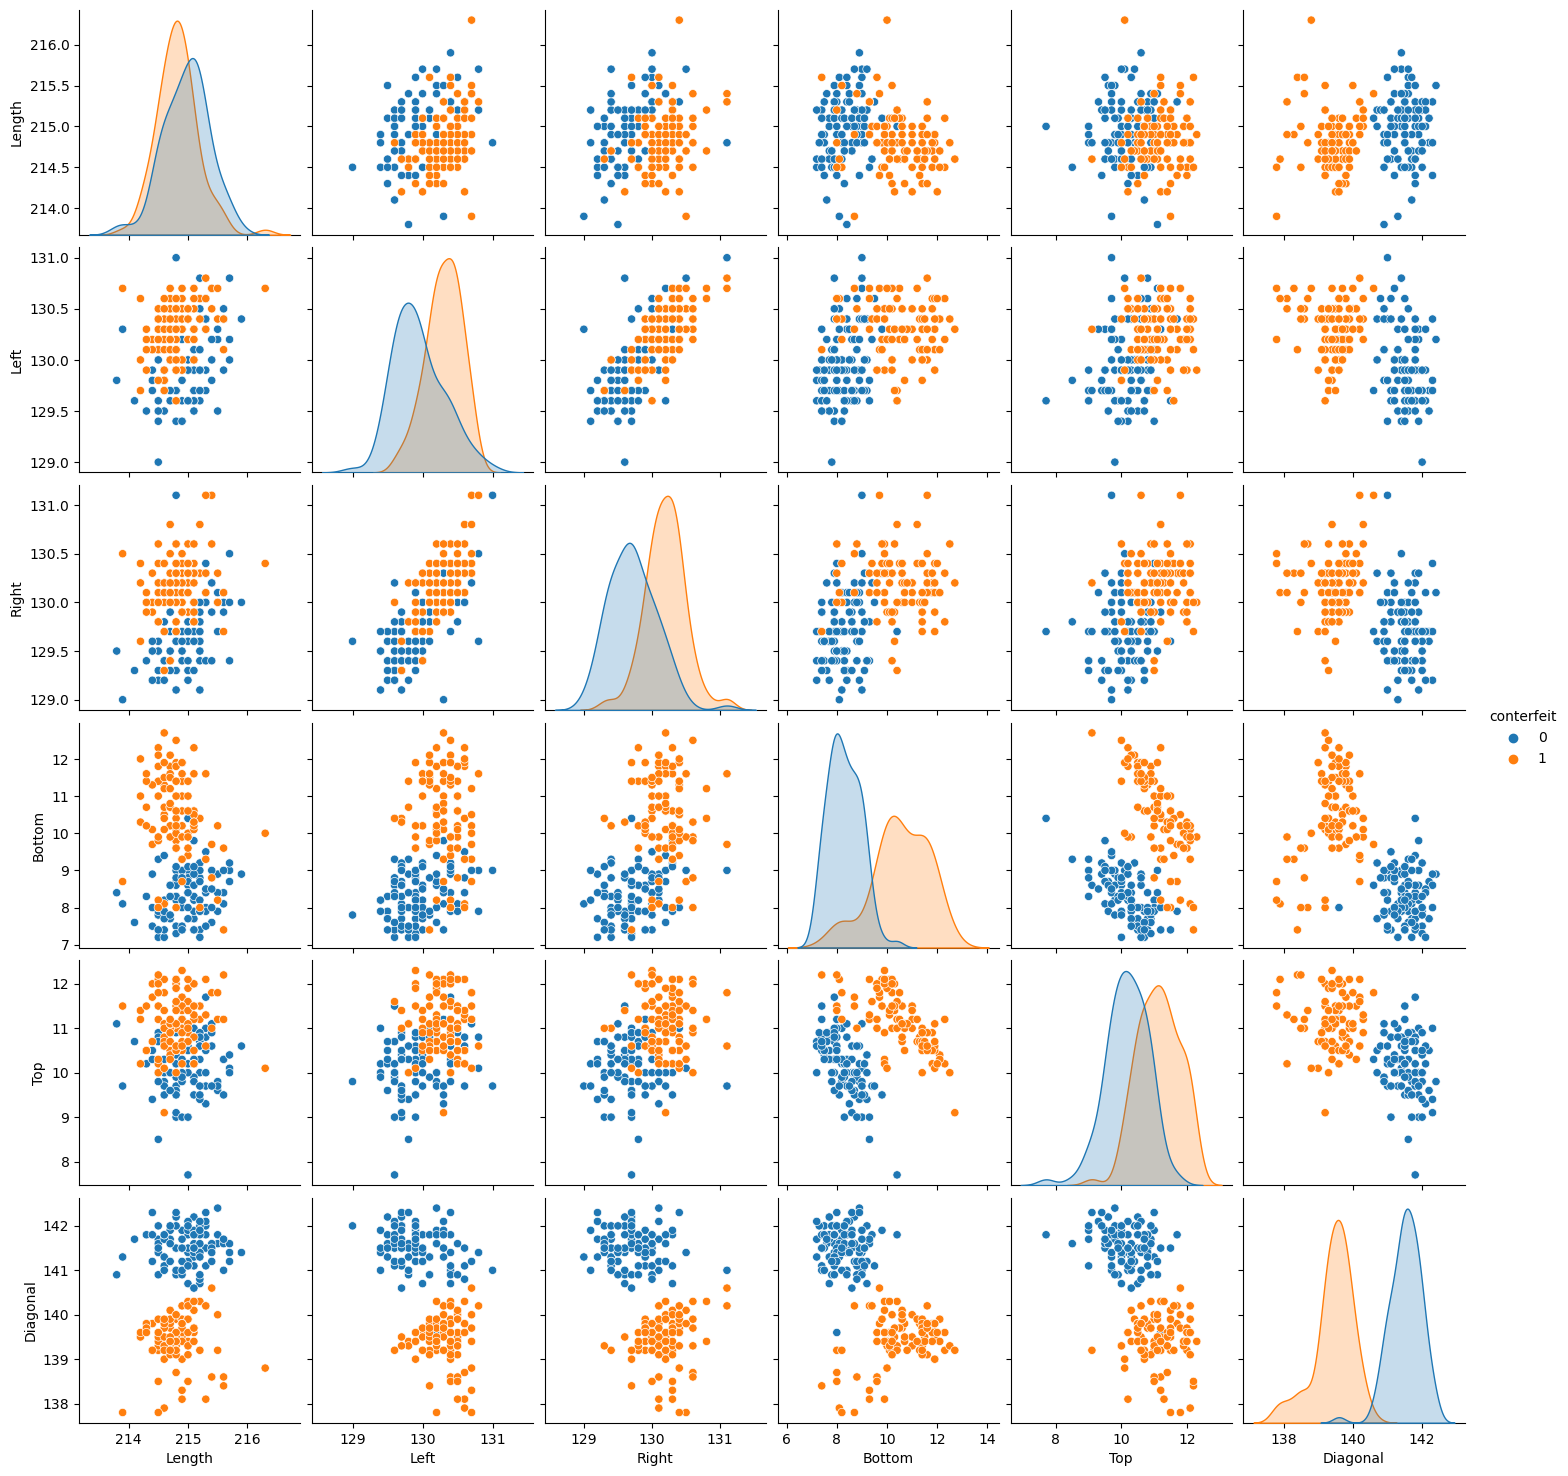

In [8]:
sns.pairplot(df, hue = "conterfeit")
plt.show()

<AxesSubplot:xlabel='conterfeit', ylabel='count'>

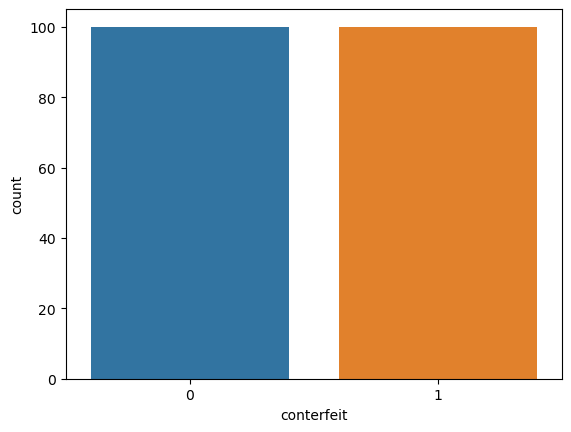

In [9]:
sns.countplot(x='conterfeit',data = df)

C:\Users\91774\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conterfeit', ylabel='Density'>

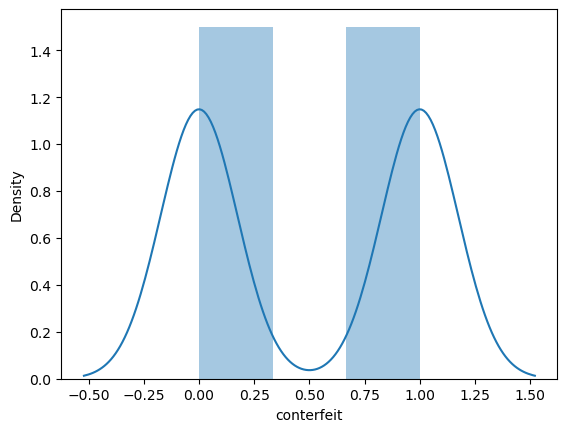

In [10]:
sns.distplot(df.conterfeit)

<AxesSubplot:xlabel='Right', ylabel='Left'>

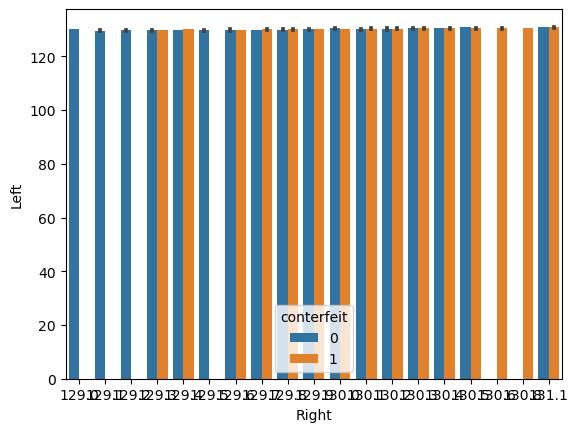

In [11]:
sns.barplot(x = 'Right',y = 'Left',data = df,hue= 'conterfeit')

<AxesSubplot:xlabel='Right', ylabel='Left'>

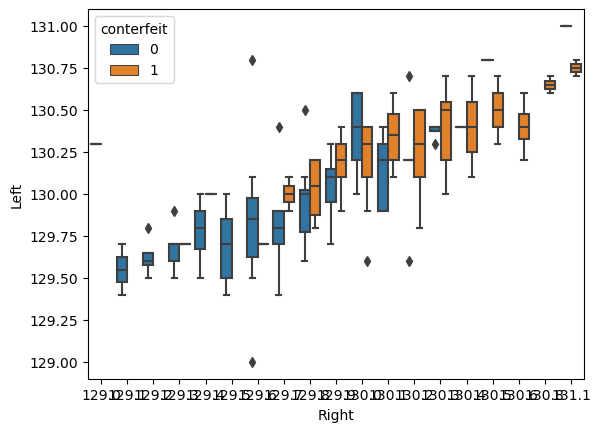

In [12]:
sns.boxplot(x = 'Right',y = 'Left',data=df,hue ='conterfeit')

<AxesSubplot:xlabel='Top', ylabel='Bottom'>

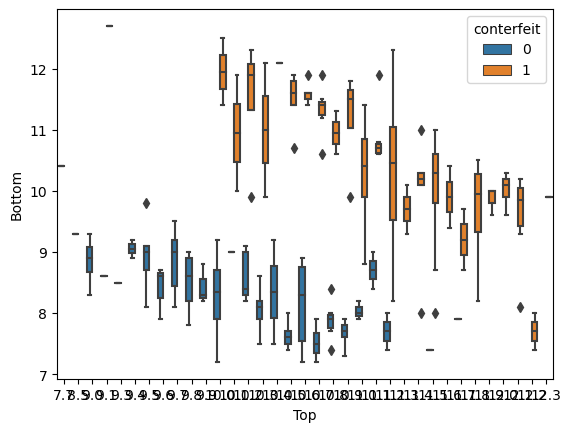

In [13]:
sns.boxplot(x ='Top',y ='Bottom',data = df,hue ='conterfeit')

<AxesSubplot:xlabel='Top', ylabel='Bottom'>

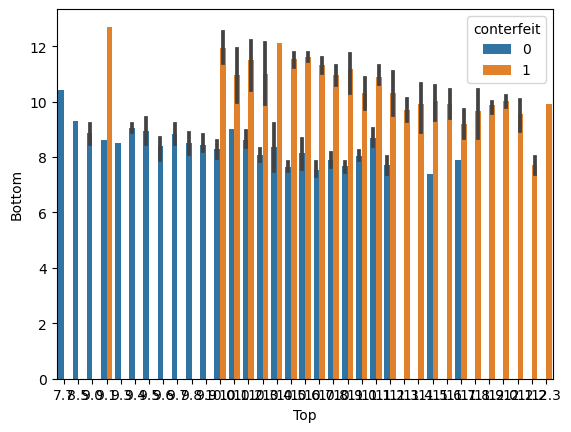

In [14]:
sns.barplot(x = 'Top',y = 'Bottom',data = df,hue = 'conterfeit')

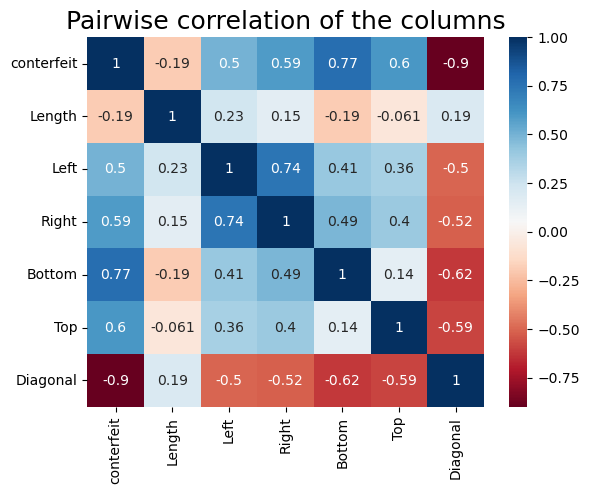

In [15]:
sns.heatmap(df.corr(),annot = True,cmap="RdBu")
plt.title("Pairwise correlation of the columns",fontsize = 18)
plt.show()

In [20]:
df = df.reindex(np.random.permutation(df.index))

x = df.drop(columns = "conterfeit")
y = df["conterfeit"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

pred = model.predict(st.transform(x_test))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class_report = classification_report(y_test,pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("confusion Matrix\n",conf_matrix)
print("\nAccuracy\n", acc)

results = []
results.append(("LogisticRegression",class_report,conf_matrix, acc))


Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

confusion Matrix
 [[20  0]
 [ 0 20]]

Accuracy
 1.0


In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

pred = svc.predict(st.transform(x_test))

class_report = classification_report(y_test,pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n",class_report)
print("Confusoon Matrix\n",conf_matrix)
print("\nAccuracy\n", acc)
results.append(("SVC", class_report,conf_matrix,acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusoon Matrix
 [[20  0]
 [ 0 20]]

Accuracy
 1.0


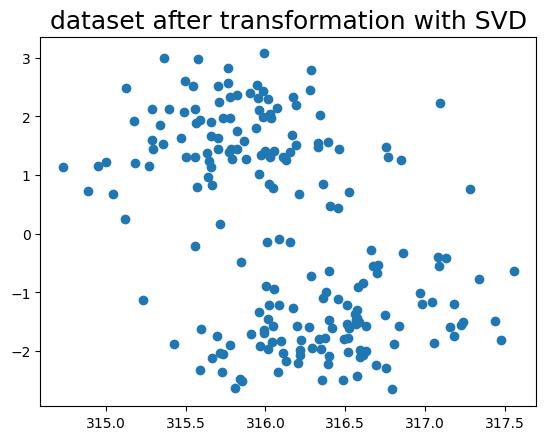

In [26]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2,random_state = 0)

transf = svd.fit_transform(x)

plt.scatter(x = transf[:,0],y = transf[:,1])
plt.title("dataset after transformation with SVD", fontsize = 18)
plt.show()


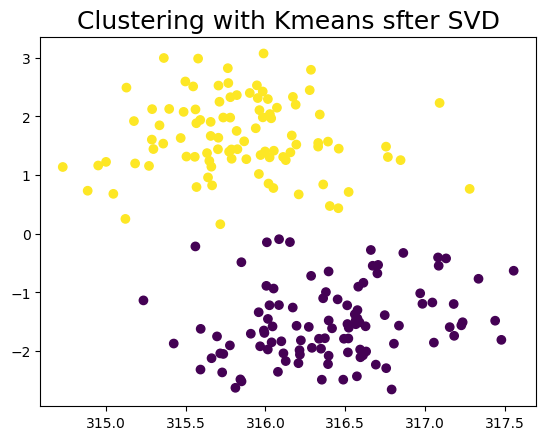

In [28]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
c = km.fit_predict(transf)

plt.scatter(x = transf[:,0],y = transf[:,1],c = c)
plt.title("Clustering with Kmeans sfter SVD", fontsize = 18)
plt.show()

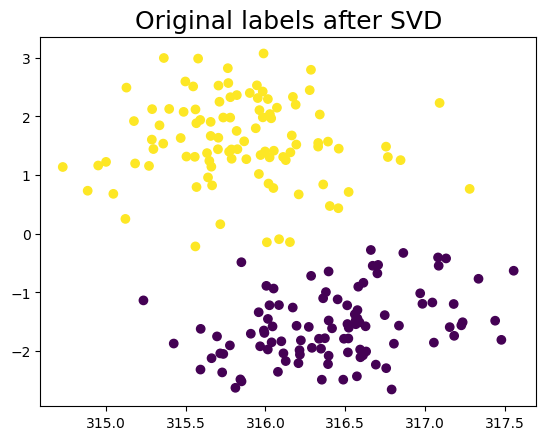

In [29]:
plt.scatter(x = transf[:,0],y = transf[:,1],c = y)
plt.title("Original labels after SVD", fontsize = 18)
plt.show()

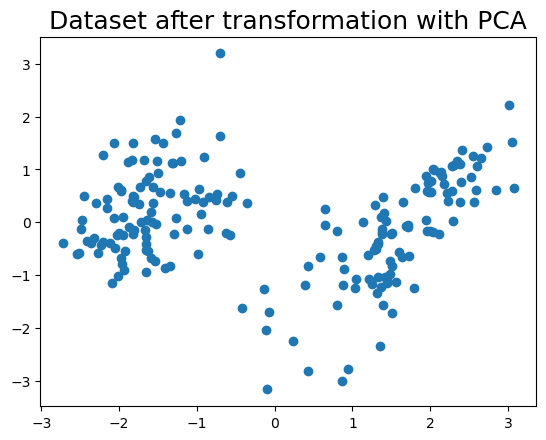

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2,random_state = 0)

transf = pca.fit_transform(x)

plt.scatter(x = transf[:,0],y = transf[:,1])
plt.title("Dataset after transformation with PCA", fontsize = 18)
plt.show()

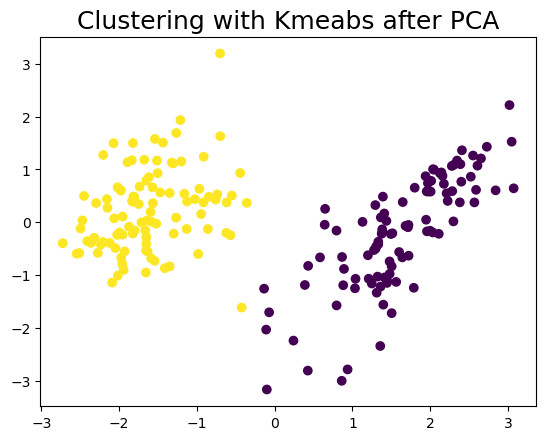

In [35]:
km = KMeans(n_clusters = 2)
c = km.fit_predict(transf)

plt.scatter(x = transf[:,0],y = transf[:,1],c = c)
plt.title("Clustering with Kmeabs after PCA", fontsize = 18)
plt.show()

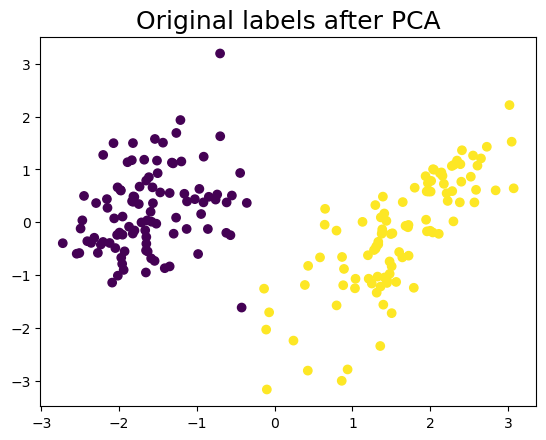

In [36]:
plt.scatter(x = transf[:,0], y = transf[:,1], c = y)
plt.title("Original labels after PCA", fontsize = 18)
plt.show()

C:\Users\91774\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


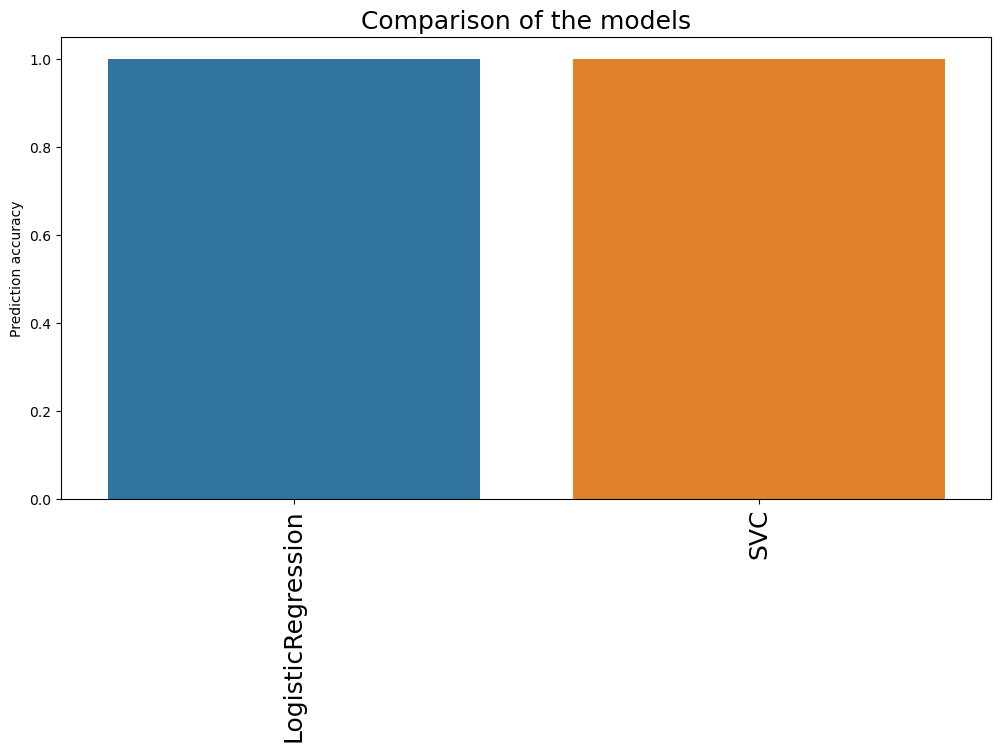

In [37]:
labels  = []
height = []
for i in range(len(results)):
    labels.append(results[i][0])
    height.append(results[i][-1])
    
plt.figure(figsize = (12,6))    
ax = sns.barplot(labels,height)
ax.set_xticklabels(labels, fontsize = 18, rotation = 90)
plt.title("Comparison of the models", fontsize = 18)
plt.ylabel("Prediction accuracy")
plt.show()